![example](images/director_shot.jpeg)



## ****COPY   COPY  COPY  ****   4.51PM, SAT

Tori Magin 

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
basics = pd.read_csv("data/zippedData/imdb.title.basics.csv.gz")
gross = pd.read_csv("data/zippedData/bom.movie_gross.csv.gz")
ratings = pd.read_csv("data/zippedData/imdb.title.ratings.csv.gz")

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [3]:
basics['start_year_real']=pd.to_datetime(basics['start_year'], format='%Y')
recent_basics = basics.drop(basics[basics['start_year'] < 2015].index)

In [4]:
recent_basics = recent_basics.drop(recent_basics[recent_basics['start_year'] > 2022].index)

In [5]:
recent_basics = recent_basics.set_index('tconst')
ratings = ratings.set_index('tconst')

In [6]:
bnr = pd.merge(recent_basics,ratings, on=['tconst'],how='left') 

In [7]:
bnr.rename(columns = {'primary_title':'title'}, inplace = True)

In [8]:
#recent_basics_titles = recent_basics_titles.reset_index()
#recent_basics_titles.rename(columns = {'primary_title':'title'}, inplace = True)
gross.sort_values('year', ascending=False)
basics.sort_values('start_year', ascending=False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,start_year_real
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama,2115-01-01
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy",2027-01-01
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy,2026-01-01
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy",2025-01-01
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy",2024-01-01
...,...,...,...,...,...,...,...
74712,tt4264626,Civil War Life: Shot to Pieces,Civil War Life: Shot to Pieces,2010,79.0,Documentary,2010-01-01
14471,tt1716746,Heinrich Kieber - Datendieb,Heinrich Kieber - Datendieb,2010,52.0,Documentary,2010-01-01
74692,tt4263706,Mushrooms of America,Mushrooms of America,2010,46.0,"Adventure,Comedy,Documentary",2010-01-01
118065,tt7059624,Zamana,Zamana,2010,140.0,Drama,2010-01-01


In [9]:
gross = gross.set_index('title')
#recent_basics_titles = recent_basics_titles.set_index('title')

In [10]:
bnr.rename(columns = {'primary_title':'title'}, inplace = True)

In [13]:
#basics_gross = recent_basics_titles.join(gross, how='outer')
bnr_2 = pd.merge(bnr,gross, on=['title'],how='left') 
bnr_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77300 entries, 0 to 77299
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            77300 non-null  object        
 1   original_title   77281 non-null  object        
 2   start_year       77300 non-null  int64         
 3   runtime_minutes  57036 non-null  float64       
 4   genres           74096 non-null  object        
 5   start_year_real  77300 non-null  datetime64[ns]
 6   averagerating    35635 non-null  float64       
 7   numvotes         35635 non-null  float64       
 8   studio           1491 non-null   object        
 9   domestic_gross   1486 non-null   float64       
 10  foreign_gross    842 non-null    object        
 11  year             1492 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 7.7+ MB


In [ ]:
bnr_2.info()

In [14]:


bnr_2.dropna(subset=['domestic_gross'], inplace=True)

In [15]:
gross.dropna(subset=['foreign_gross'], inplace=True)
gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, Toy Story 3 to Antonio Lopez 1970: Sex Fashion & Disco
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          2033 non-null   object 
 1   domestic_gross  2009 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            2037 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 79.6+ KB


In [ ]:
#gross['foreign_gross'] = pd.to_numeric(gross['foreign_gross'])

In [16]:
gross['foreign_gross'] = gross['foreign_gross'].map(lambda x: x.replace(',',""))

In [ ]:
gross.iloc[1300:1303]

In [17]:
#Atfer removing the commas, the values can be converted to floats. However, it's clear these numbers are not correctly formatted. 
#Because there is only three and the difference is very large (potentially significant), I manually replaced the values with the true foreign gross. 

gross['foreign_gross']= gross['foreign_gross'].replace([1131.6],1131561399)
gross['foreign_gross']= gross['foreign_gross'].replace([1019.4],1018130012)
gross['foreign_gross']= gross['foreign_gross'].replace([1163.0],1162040651)
gross.iloc[1300:1305]

,studio,domestic_gross,foreign_gross,year
title,,,,
Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
Jurassic World,Uni.,652300000.0,1019.4,2015
Furious 7,Uni.,353000000.0,1163.0,2015
Avengers: Age of Ultron,BV,459000000.0,946400000,2015
Minions,Uni.,336000000.0,823400000,2015


In [18]:
bnr_2['foreign_gross'].isna().sum() /  (bnr_2['foreign_gross'].count()+bnr_2['foreign_gross'].isna().sum())

0.43741588156123823

In [20]:
gross['foreign_gross']= gross['foreign_gross'].astype('float')
gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, Toy Story 3 to Antonio Lopez 1970: Sex Fashion & Disco
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          2033 non-null   object 
 1   domestic_gross  2009 non-null   float64
 2   foreign_gross   2037 non-null   float64
 3   year            2037 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 79.6+ KB


In [21]:
f_gross_median = gross['foreign_gross'].median()
f_gross_median

18700000.0

In [22]:
bnr_2['foreign_gross'] = bnr_2['foreign_gross'].fillna(f_gross_median)

In [23]:
bnr_2['foreign_gross']= bnr_2['foreign_gross'].replace(['1,131.6'],1131561399)
bnr_2['foreign_gross']= bnr_2['foreign_gross'].replace(['1,019.4'],1018130012)
bnr_2['foreign_gross']= bnr_2['foreign_gross'].replace(['1,163.0'],1162040651)
bnr_2['foreign_gross']= bnr_2['foreign_gross'].replace(['1,369.5'],1369500000)
bnr_2['foreign_gross']= bnr_2['foreign_gross'].replace(['1,010.0'],1010000000)

In [24]:
bnr_2['foreign_gross'] = bnr_2['foreign_gross'].astype('float')

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [25]:
#26 records had no genre, so it is easiest to remove this small number of records with missing info. 
bnr_2= bnr_2.dropna(subset=['genres'])


In [26]:
genres = bnr_2['genres']
str(genres)

'18             Action,Crime,Drama\n29        Action,Adventure,Sci-Fi\n30                    Crime,Drama\n32        Biography,Drama,History\n43       Action,Adventure,Fantasy\n                   ...           \n76661                       Drama\n76726                       Drama\n76871                Action,Drama\n76901                       Crime\n77239                 Documentary\nName: genres, Length: 1460, dtype: object'

In [27]:
genres1 = bnr_2['genres'].map(lambda x: x.split(', '))

In [28]:
bnr_2['genreslist'] = bnr_2['genres'].tolist()

In [29]:
musical_gross= []
for x in bnr_2[]:
    if 'Musical' in x:
        musical_gross.append(x)
musical_gross


SyntaxError: invalid syntax (4283088248.py, line 2)

In [30]:
print(bnr_2['genres'].map(lambda x: x.split(',')))

18             [Action, Crime, Drama]
29        [Action, Adventure, Sci-Fi]
30                     [Crime, Drama]
32        [Biography, Drama, History]
43       [Action, Adventure, Fantasy]
                     ...             
76661                         [Drama]
76726                         [Drama]
76871                 [Action, Drama]
76901                         [Crime]
77239                   [Documentary]
Name: genres, Length: 1460, dtype: object


In [ ]:
sent_str = ""
for x in bnr_2['genreslist']:
    sent_str += str(x) + ","
sent_str = sent_str.split(',')


In [ ]:
from collections import Counter
counts_average = Counter(sent_str).most_common()
print(counts_average)
type(counts_average)


In [ ]:
names = []
for x in counts_average:
    names.append(x[0])
names

In [ ]:
values = []
for x in counts_average:
    values.append(x[1])
print(names)
print(values)

In [31]:
bnr_2['genres'] = bnr_2['genres'].map(lambda x: str(x))

In [ ]:
fig, ax = plt.subplots()
barlist=plt.bar(range(len(counts_average)), values, tick_label=names)
plt.xticks(rotation=90)
ax.set_ylabel('Number of movies for each genre')
ax.set_xlabel('Genres')
ax.set_title('2015-2019 TOP20 highest rated IMDB movies \n Most common genres \n', fontweight="bold")
barlist[0].set_color('blue')
fig.tight_layout()
plt.savefig('./images/top20_IMDB_genres.png', bbox_inches = "tight")
plt.show();

In [32]:
bnr_2['total_gross'] = bnr_2['domestic_gross'] + bnr_2['foreign_gross']

## Analysis by Ratings

In [33]:
by_gross = bnr_2.sort_values('total_gross', ascending=False)
top_300 = by_gross['total_gross'][0:300]
top_300 = list(top_300)

len(top_300)

300

In [34]:
by_rating = bnr_2.sort_values('total_gross', ascending=False)
best_300 = by_rating['averagerating'][0:300]
best_300 = list(best_300)


In [35]:
bottom_gross = bnr_2.sort_values('total_gross')
bottom_300 = bottom_gross['total_gross'][0:300]
bottom_300 = list(bottom_300)


In [36]:
worst_ratings = bnr_2.sort_values('total_gross')
worst_300 = worst_ratings['averagerating'][0:300]
worst_300 = list(worst_300)

In [64]:
tops = pd.DataFrame()
tops['Gross'] = top_300
tops['AvgRatings'] = best_300
tops['runtime'] = Time_top_300 

tops = tops.dropna()

correlation = tops.corr(method='pearson')
correlation

tops['runtime'].mean()


112.13257575757575

In [39]:
CorrelationDF = pd.DataFrame()
CorrelationDF['gross'] = bnr_2['total_gross']
CorrelationDF['Avg_Rating'] = bnr_2['averagerating']
CorrelationDF['runtime'] = bnr_2['runtime_minutes']

CorrelationDF
correlation = CorrelationDF.corr(method='pearson')
correlation

,gross,Avg_Rating,runtime
gross,1.000000,0.135255,0.137843
Avg_Rating,0.135255,1.000000,0.198598
runtime,0.137843,0.198598,1.000000


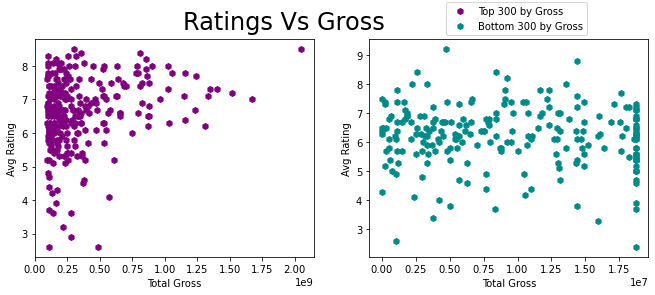

In [40]:
# Rating Vs Gross
fig, (ax1, ax2) = plt.subplots(figsize=(11,4), ncols=2)

ax1.scatter(x=top_300, y=best_300, color='purple', marker='h')
ax1.set_xlabel('Total Gross')
ax1.set_ylabel('Avg Rating')


ax2.scatter(x=bottom_300, y=worst_300,color='darkcyan', marker='h')
ax2.set_xlabel('Total Gross')
ax2.set_ylabel('Avg Rating')

fig.suptitle("Ratings Vs Gross", fontsize=24, x=0.44)

fig.legend(labels=["Top 300 by Gross", "Bottom 300 by Gross"], loc=(.68, .88));

## Analysis by Runtime 


In [61]:
top_by_runtime = bnr_2.sort_values('total_gross', ascending=False)
Time_top_300 = top_by_runtime['runtime_minutes'][0:300]
Time_top_300 = list(Time_top_300)


[149.0,
 124.0,
 137.0,
 141.0,
 134.0,
 152.0,
 128.0,
 118.0,
 136.0,
 91.0,
 147.0,
 143.0,
 133.0,
 89.0,
 97.0,
 108.0,
 119.0,
 134.0,
 148.0,
 133.0,
 87.0,
 151.0,
 123.0,
 136.0,
 95.0,
 130.0,
 75.0,
 141.0,
 105.0,
 98.0,
 129.0,
 147.0,
 108.0,
 119.0,
 123.0,
 135.0,
 131.0,
 115.0,
 120.0,
 134.0,
 137.0,
 107.0,
 108.0,
 144.0,
 118.0,
 154.0,
 140.0,
 142.0,
 125.0,
 118.0,
 121.0,
 144.0,
 156.0,
 113.0,
 112.0,
 97.0,
 97.0,
 106.0,
 95.0,
 117.0,
 140.0,
 87.0,
 89.0,
 114.0,
 114.0,
 40.0,
 9.0,
 128.0,
 105.0,
 123.0,
 123.0,
 141.0,
 94.0,
 114.0,
 135.0,
 120.0,
 117.0,
 102.0,
 118.0,
 120.0,
 105.0,
 96.0,
 110.0,
 106.0,
 110.0,
 97.0,
 95.0,
 130.0,
 92.0,
 122.0,
 90.0,
 80.0,
 72.0,
 103.0,
 129.0,
 93.0,
 92.0,
 116.0,
 60.0,
 134.0,
 130.0,
 131.0,
 107.0,
 109.0,
 113.0,
 102.0,
 161.0,
 113.0,
 127.0,
 108.0,
 115.0,
 90.0,
 127.0,
 117.0,
 80.0,
 123.0,
 nan,
 119.0,
 90.0,
 74.0,
 164.0,
 114.0,
 104.0,
 167.0,
 107.0,
 109.0,
 88.0,
 112.0,
 105.0,
 

In [66]:
TopRuntime = pd.DataFrame()
TopRuntime['Gross'] = top_300
TopRuntime['Runtime'] = Time_top_300 

TopRuntime = TopRuntime.dropna()
TopRuntime

,Gross,Runtime
0,2.048300e+09,149.0
1,1.670430e+09,124.0
2,1.515041e+09,137.0
3,1.405400e+09,141.0
4,1.347000e+09,134.0
...,...,...
295,9.700000e+07,132.0
296,9.600000e+07,119.0
297,9.530000e+07,90.0
298,9.530000e+07,100.0


In [67]:
bottom_by_runtime = bnr_2.sort_values('total_gross')
Time_bottom_300 = bottom_by_runtime['runtime_minutes'][0:300]
Time_bottom_300 = list(Time_bottom_300)


In [68]:
BottomsRuntime = pd.DataFrame()
BottomsRuntime['Gross'] = bottom_300
BottomsRuntime['Runtime'] = Time_bottom_300 

BottomsRuntime = BottomsRuntime.dropna()

BottomsRuntime['Runtime'].mean()

98.41044776119404

In [69]:
correlation = BottomsRuntime.corr(method='pearson')
correlation()

TypeError: 'DataFrame' object is not callable

In [70]:
BottomsRuntime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gross    268 non-null    float64
 1   Runtime  268 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB


Text(0.51, 1.1, 'Runtime Vs Gross')

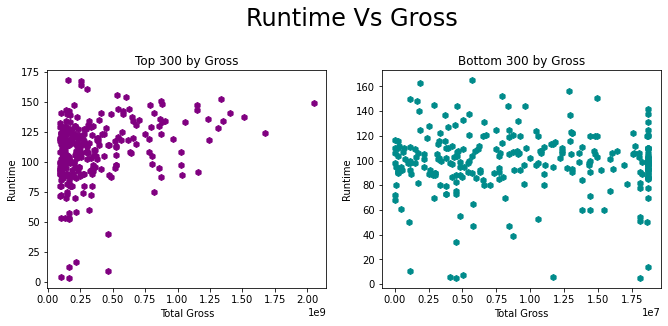

In [71]:
# Runtime Vs Gross
fig, (ax3, ax4) = plt.subplots(figsize=(11,4), ncols=2)

ax3.scatter(x=top_300, y=Time_top_300, color='purple', marker='h')
ax3.set_title('Top 300 by Gross')
ax3.set_xlabel('Total Gross')
ax3.set_ylabel('Runtime')


ax4.scatter(x=bottom_300, y=Time_bottom_300,color='darkcyan', marker='h')
ax4.set_title('Bottom 300 by Gross')
ax4.set_xlabel('Total Gross')
ax4.set_ylabel('Runtime')

fig.suptitle("Runtime Vs Gross", fontsize=24, x=0.51, y=1.1)


## Analysis by Genre 


In [72]:
bnr_by_gross = bnr_2.sort_values('total_gross', ascending=False)
bnr_top300_by_gross = bnr_by_gross[0:300]


In [73]:
Top_genres = ""
for x in bnr_top300_by_gross['genreslist']:
    Top_genres += str(x) + ","
Top_genres = Top_genres.split(',')

len(Top_genres)

756

In [75]:
from collections import Counter
top_counts_average = Counter(Top_genres).most_common()
print(top_counts_average)
type(top_counts_average)

[('Action', 120), ('Adventure', 117), ('Comedy', 103), ('Drama', 101), ('Thriller', 38), ('Animation', 37), ('Fantasy', 33), ('Sci-Fi', 31), ('Horror', 28), ('Crime', 27), ('Documentary', 23), ('Biography', 22), ('Mystery', 19), ('Romance', 16), ('Family', 14), ('History', 12), ('Music', 6), ('Sport', 5), ('Musical', 2), ('War', 1), ('', 1)]


list

In [87]:
top_names = []
for x in top_counts_average:
    top_names.append(x[0])


In [86]:
top_values = []
for x in top_counts_average:
    top_values.append(x[1])


In [78]:
bnr_by_gross_bottom = bnr_2.sort_values('total_gross')
bnr_bottom300_by_gross = bnr_by_gross_bottom[0:300]

len(bnr_bottom300_by_gross)

300

In [79]:
bottom_genres = ""
for x in bnr_bottom300_by_gross['genreslist']:
    bottom_genres += str(x) + ","
bottom_genres = bottom_genres.split(',')

len(bottom_genres)

608

In [80]:
from collections import Counter
bottom_counts_average = Counter(bottom_genres).most_common()
bottom_counts_average = bottom_counts_average
len(bottom_counts_average)


21

In [81]:
bottom_names = []
for x in bottom_counts_average:
    bottom_names.append(x[0])

bottom_names = bottom_names

In [82]:
bottom_values = []
for x in bottom_counts_average:
    bottom_values.append(x[1])

bottom_values = bottom_values
print(bottom_names)
print(bottom_values)

['Drama', 'Comedy', 'Thriller', 'Documentary', 'Action', 'Biography', 'Romance', 'Horror', 'Crime', 'Mystery', 'History', 'Adventure', 'Music', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Sport', 'War', 'Western', '']
[176, 63, 50, 45, 39, 35, 34, 31, 24, 23, 16, 16, 10, 10, 9, 8, 6, 6, 5, 1, 1]


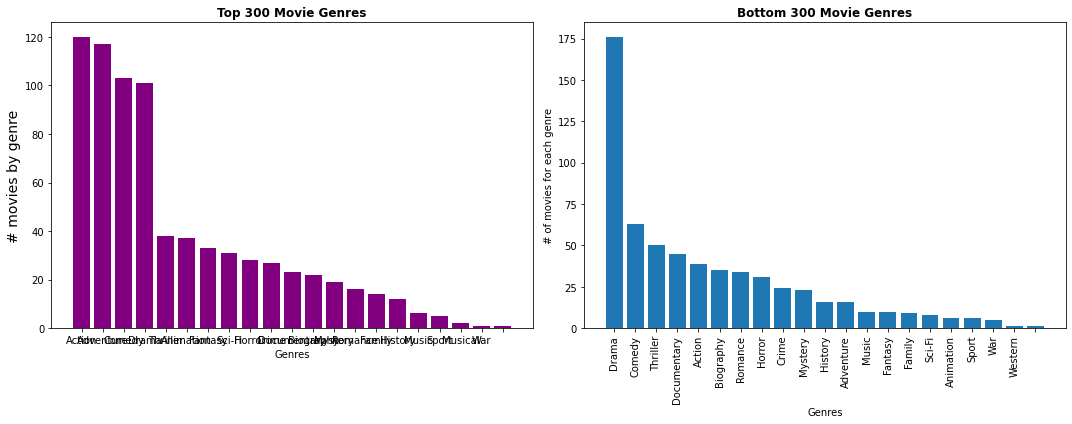

In [83]:
fig, (gt,gb) = plt.subplots(figsize=(15,6), ncols=2)

gt.bar(range(len(top_counts_average)), top_values, color=('purple'), tick_label=top_names)
plt.xticks(rotation = 90)
gt.set_ylabel('# movies by genre', fontsize=14)
gt.set_xlabel('Genres')
gt.set_title('Top 300 Movie Genres', fontweight="bold")


gb.bar(range(len(bottom_counts_average)), bottom_values, tick_label=bottom_names)
plt.xticks(rotation=90)
gb.set_ylabel('# of movies for each genre')
gb.set_xlabel('Genres')
gb.set_title('Bottom 300 Movie Genres', fontweight="bold")
fig.tight_layout()
plt.savefig('./images/top20_IMDB_genres.png', bbox_inches = "tight")
plt.show();


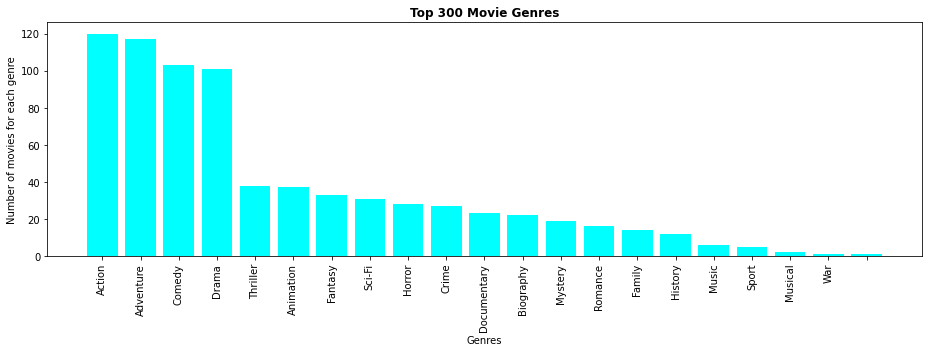

In [84]:
fig, gt = plt.subplots(figsize=(13,5))
barlist=plt.bar(range(len(top_counts_average)), top_values, color=('cyan'), tick_label=top_names)
plt.xticks(rotation=90)
gt.set_ylabel('Number of movies for each genre')
gt.set_xlabel('Genres')
gt.set_title('Top 300 Movie Genres', fontweight="bold")
fig.tight_layout()
plt.savefig('./images/top20_IMDB_genres.png', bbox_inches = "tight")
plt.show();

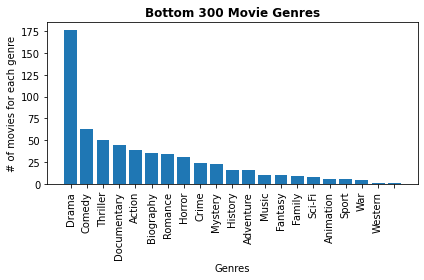

In [85]:
fig, gb = plt.subplots()
bottom_genres_bar=plt.bar(range(len(bottom_counts_average)), bottom_values, tick_label=bottom_names)
plt.xticks(rotation=90)
gb.set_ylabel('# of movies for each genre')
gb.set_xlabel('Genres')
gb.set_title('Bottom 300 Movie Genres', fontweight="bold")
fig.tight_layout()
plt.savefig('./images/top20_IMDB_genres.png', bbox_inches = "tight")
plt.show();

In [90]:
bnr_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 18 to 77239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            1460 non-null   object        
 1   original_title   1460 non-null   object        
 2   start_year       1460 non-null   int64         
 3   runtime_minutes  1374 non-null   float64       
 4   genres           1460 non-null   object        
 5   start_year_real  1460 non-null   datetime64[ns]
 6   averagerating    1248 non-null   float64       
 7   numvotes         1248 non-null   float64       
 8   studio           1460 non-null   object        
 9   domestic_gross   1460 non-null   float64       
 10  foreign_gross    1460 non-null   float64       
 11  year             1460 non-null   float64       
 12  genreslist       1460 non-null   object        
 13  total_gross      1460 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int6

In [88]:
bnr_by_gross = bnr_2.sort_values('total_gross', ascending=False)
bnr_top100_by_gross = bnr_by_gross[0:100]



In [91]:
Top_studios = ""
for x in bnr_top100_by_gross['studio ']:
    Top_studios += str(x) + ","
Top_studios = Top_studios.split(',')

len(Top_studios)

KeyError: 'studio '

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***